# Import

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Normalizer
from keras.utils import to_categorical

In [160]:
df = pd.read_csv("House_Rent_Dataset.csv")
data = df.drop(columns='Posted On')

In [69]:
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


### Encoding categorial

In [73]:
def cat_encode(categorical_values):
    """categorical_values - массив категориальных значений"""

    # Преобразование категориальных значений в целочисленные индексы
    label_to_index = {label: index for index, label in enumerate(sorted(set(categorical_values)))}
    encoded_labels = [label_to_index[label] for label in categorical_values]

    # Преобразование целочисленных индексов в one-hot encoding
    one_hot_encoded = to_categorical(encoded_labels)

    return one_hot_encoded

def cat_labelEncoder(categorical_values):
    """categorical_values - массив категориальных значений"""

    # Преобразование категориальных значений в целочисленные индексы
    encoder = LabelEncoder()
    categorical_values = encoder.fit_transform(categorical_values)

    return categorical_values

def normalize(X):
    """X - data for normalize"""
    transformer = Normalizer(norm='max')
    X = transformer.fit_transform(X)
    return X

## Преобразование категориальных значений в числовые и нормализация данных

In [161]:
data['Floor'] = normalize([cat_labelEncoder(df['Floor'])]).tolist()[0]
data['Area Type'] = normalize([cat_labelEncoder(df['Area Type'])]).tolist()[0]
data['Area Locality'] = normalize([cat_labelEncoder(df['Area Locality'])]).tolist()[0]
data['City'] = normalize([cat_labelEncoder(df['City'])]).tolist()[0]
data['Furnishing Status'] = normalize([cat_labelEncoder(df['Furnishing Status'])]).tolist()[0]
data['Tenant Preferred'] = normalize([cat_labelEncoder(df['Tenant Preferred'])]).tolist()[0]
data['Point of Contact'] = normalize([cat_labelEncoder(df['Point of Contact'])]).tolist()[0]

data['BHK'] = normalize([data['BHK']]).tolist()[0]
data['Size'] = normalize([data['Size']]).tolist()[0]
data['Bathroom'] = normalize([data['Bathroom']]).tolist()[0]

In [165]:
# Функция для создания списка из значений столбцов
def combine_columns_to_list(row):
    return [val for val in row]

# Применение функции к каждой строке DataFrame
data['combined_column'] = data.drop(columns=["Rent"]).apply(combine_columns_to_list, axis=1)

In [166]:
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,combined_column
0,0.333333,10000,0.13750,0.949896,1.0,0.098926,0.8,1.0,0.5,0.2,1.0,"[0.3333333333333333, 0.1375, 0.949895615866388..."
1,0.333333,20000,0.10000,0.029228,1.0,0.683527,0.8,0.5,0.5,0.1,1.0,"[0.3333333333333333, 0.1, 0.029227557411273485..."
2,0.333333,17000,0.12500,0.029228,1.0,0.787825,0.8,0.5,0.5,0.1,1.0,"[0.3333333333333333, 0.125, 0.0292275574112734..."
3,0.333333,10000,0.10000,0.020877,1.0,0.235452,0.8,1.0,0.5,0.1,1.0,"[0.3333333333333333, 0.1, 0.020876826722338204..."
4,0.333333,7500,0.10625,0.020877,0.5,0.846016,0.8,1.0,0.0,0.1,1.0,"[0.3333333333333333, 0.10625, 0.02087682672233..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0.333333,15000,0.12500,0.565762,0.5,0.098030,0.6,0.5,0.5,0.2,1.0,"[0.3333333333333333, 0.125, 0.5657620041753654..."
4742,0.500000,29000,0.25000,0.033403,1.0,0.543420,0.6,0.5,0.5,0.3,1.0,"[0.5, 0.25, 0.033402922755741124, 1.0, 0.54341..."
4743,0.500000,35000,0.21875,0.565762,0.5,0.324082,0.6,0.5,0.5,0.3,0.0,"[0.5, 0.21875, 0.5657620041753654, 0.5, 0.3240..."
4744,0.500000,45000,0.18750,0.471816,0.5,0.264100,0.6,0.5,1.0,0.2,0.0,"[0.5, 0.1875, 0.4718162839248434, 0.5, 0.26410..."


In [ ]:
data.describe()

In [ ]:
df.nunique()

### Exploratory data analysis

<AxesSubplot:>

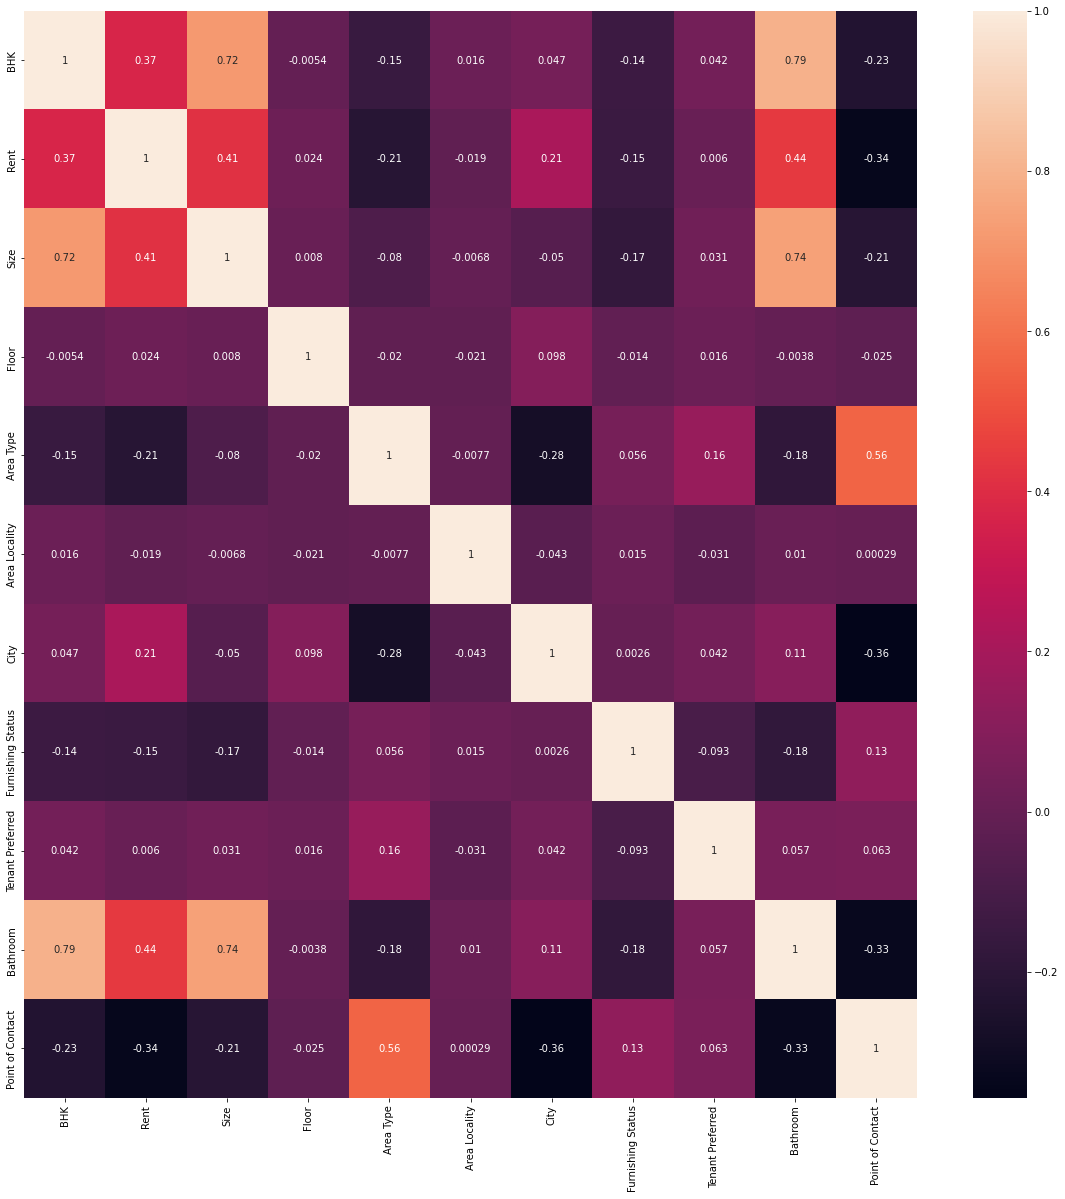

In [97]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(numeric_only=True), annot=True)

# Regression

## Random Forest

In [184]:
%%time
# X = data.drop(columns=["Rent"])#, "Posted On", "Floor", "Area Type", "Area Locality", "City", "Furnishing Status", "Tenant Preferred", "Bathroom", "Point of Contact"])
# y = data["Rent"]
X = np.array(list(data["combined_column"]))
y = data["Rent"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42, criterion='absolute_error')
rf_regressor.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = rf_regressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mse)

# Вывод результатов
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

MAE: 13213.5433
MSE: 2075776648.1977
RMSE: 45560.6919
R2 Score: 0.4792
CPU times: total: 31.1 s
Wall time: 31.3 s


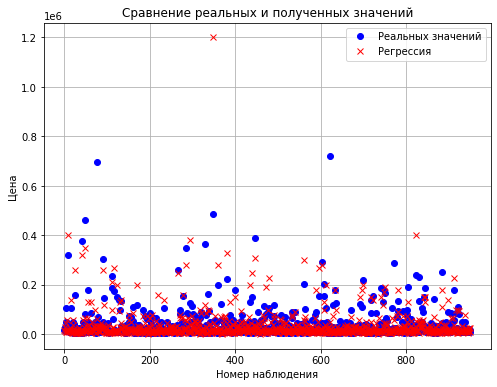

In [100]:
# Создание данных для двух линий
x = range(1, 951)
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]

# Создание графика
plt.figure(figsize=(8, 6))

# Вывод первой линии
plt.plot(x, y_pred, label='Реальных значений', color='blue', linestyle='', marker='o')

# plt.show()
# plt.figure(figsize=(8, 6))
# Вывод второй линии
plt.plot(x, y_test, label='Регрессия', color='red', linestyle='', marker='x')

# Добавление заголовка и подписей осей
plt.title('Сравнение реальных и полученных значений')
plt.xlabel('Номер наблюдения')
plt.ylabel('Цена')

# Добавление легенды
plt.legend()

# Отображение графика
plt.grid(True)
# plt.show()

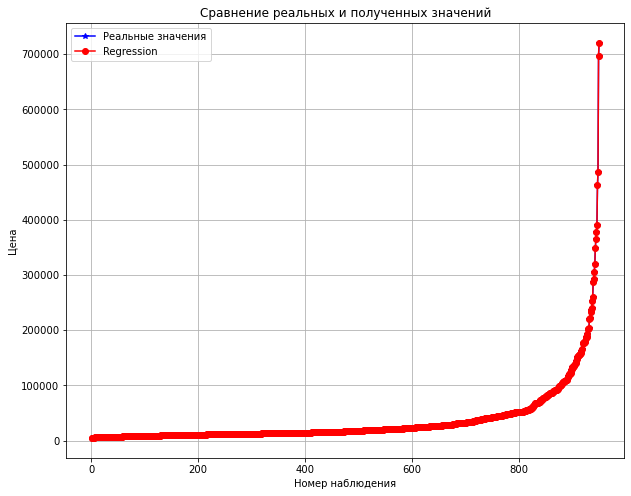

In [131]:
#y_pred y_test
# dict_y_test_pred = dict(zip(y_test, y_pred))
x = range(1, 951)
# Создание графика
plt.figure(figsize=(10, 8))

# Вывод первой линии
y_true = y_pred.copy()
y_true.sort()
plt.plot(x, y_true, label='Реальные значения', color='blue', linestyle='-', marker='*')
y_regr = y_pred.copy()
y_regr.sort()
plt.plot(x, y_regr, label='Regression', color='red', linestyle='-', marker='o')
# Добавление заголовка и подписей осей
plt.title('Сравнение реальных и полученных значений')
plt.xlabel('Номер наблюдения')
plt.ylabel('Цена')

# Добавление легенды
plt.legend()

# Отображение графика
plt.grid(True)
# plt.show()

In [185]:
X = np.array(list(data["combined_column"]))
y = data["Rent"]
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Neural Network

In [311]:
from keras import backend as K
def r2_metric(y_true, y_pred):
    m = [np.mean(y_true)]*len(y_true)
    mse = mean_squared_error(y_true, y_pred)
    mse1 = mean_squared_error(y_true, m)
    return 1 - mse/(mse1)# + K.epsilon())

In [396]:
%%time
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Генерируем случайные данные для демонстрации
# В реальности, вы будете использовать свои данные
input_dim = 10

# Создаем модель
model = Sequential()

# Добавляем слои
model.add(Dense(units=10, input_dim=input_dim, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='linear')) 

# Компилируем модель
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])


# Обучаем модель
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
95/95 [==============================] - 1s 4ms/step - loss: 8531486720.0000 - mean_squared_error: 8531486720.0000 - mean_absolute_error: 34219.2539 - val_loss: 3637808128.0000 - val_mean_squared_error: 3637808128.0000 - val_mean_absolute_error: 22263.8848
Epoch 2/50
95/95 [==============================] - 0s 2ms/step - loss: 7037400576.0000 - mean_squared_error: 7037400576.0000 - mean_absolute_error: 31084.2793 - val_loss: 3090474496.0000 - val_mean_squared_error: 3090474496.0000 - val_mean_absolute_error: 25780.9102
Epoch 3/50
95/95 [==============================] - 0s 2ms/step - loss: 6440264704.0000 - mean_squared_error: 6440264704.0000 - mean_absolute_error: 27903.3145 - val_loss: 2487231488.0000 - val_mean_squared_error: 2487231488.0000 - val_mean_absolute_error: 23211.6641
Epoch 4/50
95/95 [==============================] - 0s 2ms/step - loss: 6003853824.0000 - mean_squared_error: 6003853824.0000 - mean_absolute_error: 22169.4199 - val_loss: 2471832064.0000 - val_me

In [397]:
# Оценка модели на тестовых данных
loss = model.evaluate(X_test, y_test)
# print(f"Среднеквадратичная ошибка на тестовых данных: {loss:.4f}")
print(loss)

from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Средняя абсолютная ошибка на тестовых данных: {mae:.4f}")

print("R2 custom = ", r2_metric(np.array(y_test), y_pred))
r2 = r2_score(y_test, y_pred)
f"R2 = {r2}"

30/30 [==============================] - 0s 1ms/step - loss: 1361766144.0000 - mean_squared_error: 1361766144.0000 - mean_absolute_error: 16563.4746
[1361766144.0, 1361766144.0, 16563.474609375]
30/30 [==============================] - 0s 909us/step
Средняя абсолютная ошибка на тестовых данных: 16563.4763
R2 custom =  0.6583096649143652


'R2 = 0.6583096649143652'

In [398]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


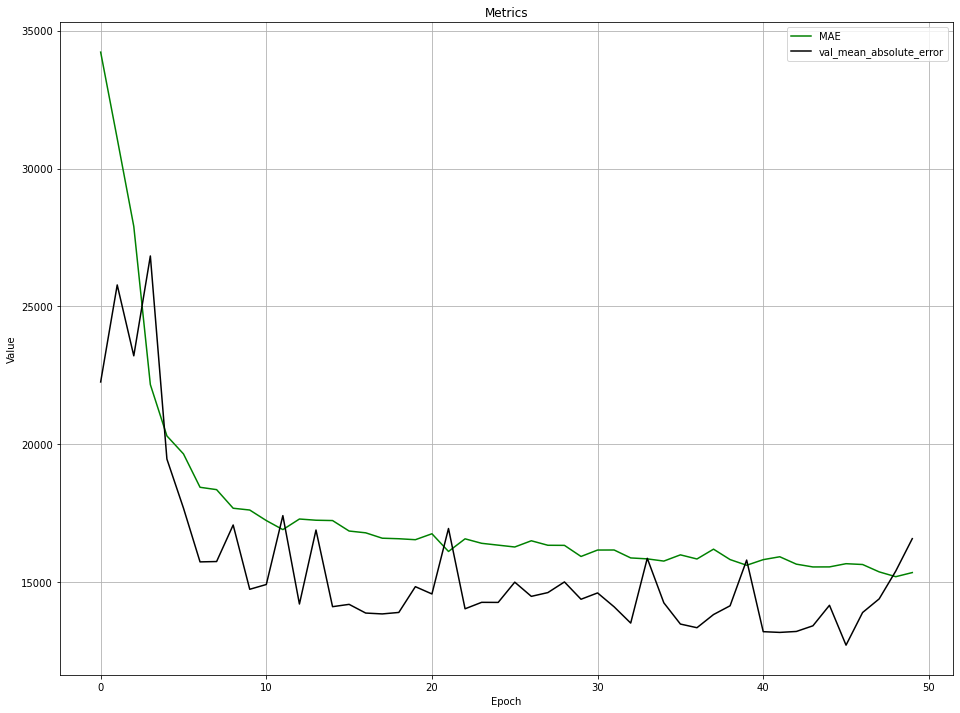

In [399]:
# Создание графика
x = history.epoch

plt.figure(figsize=(16, 12))

# plt.plot(x, history.history['loss'], label='loss', color='yellow', linestyle='-', marker='')
# plt.plot(x, history.history['mean_squared_error'], label='MSE', color='red', linestyle='-', marker='')
plt.plot(x, history.history['mean_absolute_error'], label='MAE', color='green', linestyle='-', marker='')
# plt.plot(x, history.history['val_loss'], label='val_loss', color='blue', linestyle='-', marker='')
# plt.plot(x, history.history['val_mean_squared_error'], label='val_mean_squared_error', color='purple', linestyle='-', marker='')
plt.plot(x, history.history['val_mean_absolute_error'], label='val_mean_absolute_error', color='black', linestyle='-', marker='')

plt.title('Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

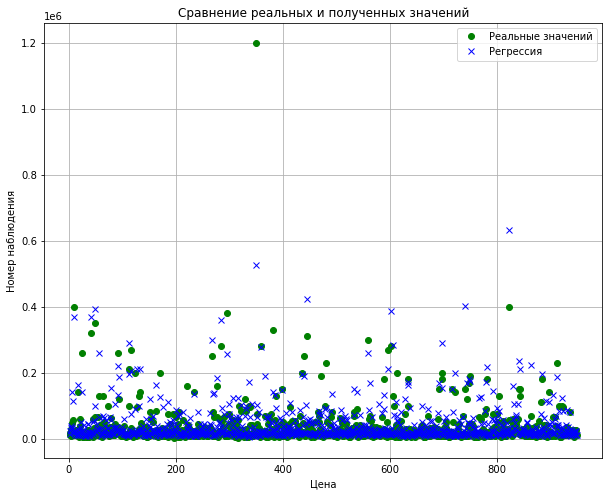

In [400]:
# Создание данных для двух линий
x = range(1, 951)

# Создание графика
plt.figure(figsize=(10, 8))

# Вывод первой линии
plt.plot(x, y_test, label='Реальные значений', color='green', linestyle='', marker='o')

# plt.show()
# plt.figure(figsize=(10, 8))
# Вывод второй линии
plt.plot(x, y_pred, label='Регрессия', color='blue', linestyle='', marker='x')

# Добавление заголовка и подписей осей
plt.title('Сравнение реальных и полученных значений')
plt.xlabel('Цена')
plt.ylabel('Номер наблюдения')

# Добавление легенды
plt.legend()

# Отображение графика
plt.grid(True)
# plt.show()

In [317]:
# Предположим, что у вас уже есть созданная модель model

for layer in model.layers:
    if hasattr(layer, 'get_weights'):
        weights = layer.get_weights()
        if len(weights) > 0:
            print(f"Weights for layer {layer.name}:")
            print(weights[0])  # Матрица весов
            if len(weights) > 1:
                print(f"Biases for layer {layer.name}:")
                print(weights[1])  # Смещение (bias)
        print("=" * 30)


Weights for layer dense_162:
[[ 0.6424259   0.25107345  0.13726224 -0.4820879   0.00282151  0.8761146
   0.62881875 -0.00163351  0.71225226 -0.4007513 ]
 [ 0.48358575  0.4275671   0.50370634  0.18175152  0.81854117  0.67510855
   1.1299865   1.3897465   1.2508153  -0.6003762 ]
 [ 0.23722827  0.48395893  0.06346494 -0.38996857  0.5090035   0.3403764
   0.27215216 -0.23815364  0.5121538   0.69456947]
 [-0.39255035 -0.67773855  0.3421807  -0.47607204 -0.37760457 -0.78941184
   0.10747892  0.08534971  0.09148908  0.45920315]
 [ 0.490523   -0.09050386  0.294059   -0.21582349  0.51542985 -0.3160038
   0.27588078  0.25095072 -0.23115544  0.21732375]
 [ 0.2108844   0.7930595  -0.05875262  0.05918455 -0.03841046  0.5390662
  -0.10678105  0.8628437  -0.0234346   0.01968407]
 [ 0.36364466  0.43865463  0.5343265  -0.04923293  0.02762864  0.11784542
  -0.6473509  -0.1281267  -0.07619546  0.43836907]
 [ 0.39342943  0.21060611  0.44858325  0.26445594  0.03807401 -0.1179587
   0.1478799   0.09139166  